In [132]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter

In [178]:
data = pd.read_csv("question_24.csv")
data = data.sort_values(["Very useful", "Useful"]).reset_index(drop=True)
data = data.set_index("Question")
data = data[data.columns[::-1]]
data = pd.DataFrame(data.stack()).reset_index()
data.columns = ["Question", "Level", "Value"]
data["Value"] = data["Value"]*100

In [179]:
plt.rcParams.update({"font.size": 13})

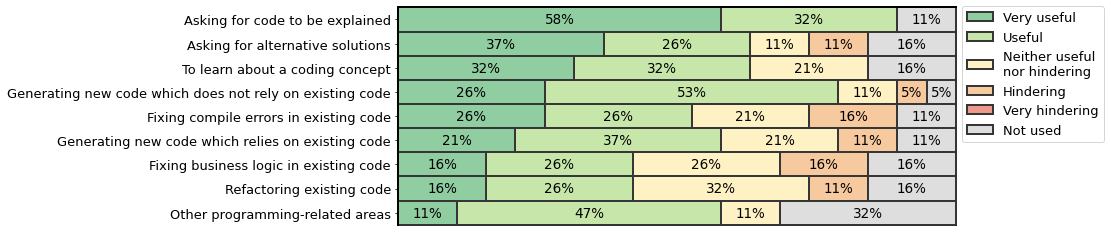

In [180]:
fig, ax = plt.subplots(figsize=(10, 4))

ax = sns.histplot(data=data, 
                  y="Question", 
                  weights="Value", 
                  hue="Level", 
                  multiple="stack", 
                  palette=sns.color_palette(["#D3D3D3", "#EA7766", "#F5B87F", "#FEEEB2", "#B5DF8E", "#6BBD82"]),
                  linewidth=2, 
                  edgecolor="#363636")

for container in ax.containers:
    labels = [f"{int(np.floor(value.get_width() + 0.5))}%" if value.get_width() > 0 else "" for value in container]
    ax.bar_label(container, 
                 labels=labels, 
                 label_type='center', 
                 size=13.5)
    
ax.set_xlim(0, 100)
ax.set_ylim(-0.5, 8.5)
ax.spines["left"].set_linewidth(2)
ax.spines["top"].set_linewidth(2)
ax.set_ylabel("")
ax.set_xlabel("")
plt.xticks([], []);
ax.legend(['Very useful', 'Useful', 'Neither useful\nnor hindering', 'Hindering', 'Very hindering', 'Not used'], loc=(1.01, 0.38))
legend.set_title("")

plt.savefig("question_24.png", 
            dpi=300,
            bbox_inches="tight",
            facecolor="white")